In [1]:
import pandas as pd
from pprint import pprint
from datetime import datetime, timedelta

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
pd.options.mode.chained_assignment = None


# To see charts directly within the notebook. 
%matplotlib inline

# This command will make the plots more attractive by adopting the common style of a different library called ggplot
mpl.style.use("ggplot")

In [2]:
TweetData = pd.read_excel('TweetData.xlsx')

In [98]:
# How many tweets per type of university
count_tweets = TweetData.groupby(['Funding','University']).size().reset_index(name='count_tweets')

### University analysis
#### Calculating means and standard deviations

In [99]:
university_sentiment = TweetData.groupby('University').agg({'ID': 'count',
                                                    'Joy': ['mean','std'],
                                                    'Anger': ['mean','std'],
                                                    'Sadness': ['mean','std'],
                                                    'Fear': ['mean','std'],
                                                    'Surprise': ['mean','std']}).reset_index().rename(columns={'ID':'count_tweets'})
university_sentiment.set_index('University', inplace=True)

In [100]:
university_sentiment

count_tweets       Joy               Anger  \
                                  count      mean       std      mean   
University                                                              
Carnegie Mellon University         1989  0.310242  0.199445  0.184044   
Columbia University                1999  0.257449  0.208882  0.203176   
Cornell University                 1941  0.281575  0.209766  0.202553   
Duke University                    1083  0.241763  0.181944  0.167986   
Emory University                   1403  0.298932  0.217776  0.208946   
Georgia Tech, Atlanta              1979  0.263872  0.200706  0.219751   
Harvard University                 1974  0.173801  0.150801  0.243454   
Johns Hopkins University           2970  0.224888  0.185983  0.200141   
MIT, Cambridge, MA                 2976  0.247230  0.175093  0.232937   
Northwestern University            1000  0.245641  0.178956  0.157406   
Stanford University                2966  0.200556  0.170687  0.270092   
Stony Brook                        2904  0.264293  0.209010  0.239075   
The University of Chicago          1990  0.265944  0.199518  0.197661   
The University of Kansas            929  0.277249  0.221191  0.230547   
Tulane University                  1988  0.268283  0.195792  0.193425   
UC Irvine                          1987  0.313170  0.206305  0.184954   
UCSB, Santa Barbara                2989  0.306730  0.204737  0.196788   
UNC Chapel Hill                    2991  0.248438  0.176218  0.210558   
University of Oregon               1641  0.224140  0.195184  0.243251   
University of Pennsylvania         1987  0.240628  0.203005  0.231225   
University of Pittsburgh           1242  0.266029  0.193580  0.208156   
University of Rochester            1008  0.263353  0.218236  0.240114   
University of Virginia             1988  0.262350  0.205883  0.203902   
Vanderbilt University              1989  0.260673  0.194251  0.202250   
Yale University                    1967  0.171515  0.168317  0.216270   

                                       Sadness                Fear            \
                                 std      mean       std      mean       std   
University                                                                     
Carnegie Mellon University  0.151402  0.160429  0.103973  0.177328  0.137064   
Columbia University         0.169663  0.178623  0.112381  0.161598  0.133200   
Cornell University          0.164210  0.179796  0.121707  0.184841  0.145625   
Duke University             0.142609  0.158265  0.114575  0.158641  0.133925   
Emory University            0.171323  0.165075  0.109592  0.183679  0.142731   
Georgia Tech, Atlanta       0.172773  0.174989  0.114943  0.182863  0.140644   
Harvard University          0.167703  0.217890  0.128464  0.140058  0.106890   
Johns Hopkins University    0.172102  0.179713  0.117564  0.207277  0.162237   
MIT, Cambridge, MA          0.165234  0.167797  0.094587  0.208488  0.137983   
Northwestern University     0.122384  0.210750  0.126106  0.251130  0.163525   
Stanford University         0.177145  0.202516  0.124850  0.200034  0.150279   
Stony Brook                 0.180075  0.183800  0.115377  0.172388  0.138365   
The University of Chicago   0.158437  0.189804  0.119852  0.201628  0.150764   
The University of Kansas    0.176197  0.167003  0.121146  0.154421  0.132560   
Tulane University           0.157147  0.189094  0.121659  0.201178  0.151361   
UC Irvine                   0.157630  0.164812  0.104157  0.184067  0.130205   
UCSB, Santa Barbara         0.162966  0.178414  0.118452  0.200180  0.161569   
UNC Chapel Hill             0.154716  0.198674  0.123725  0.180175  0.127557   
University of Oregon        0.177737  0.189154  0.129530  0.186561  0.143048   
University of Pennsylvania  0.163971  0.214359  0.131384  0.173815  0.130354   
University of Pittsburgh    0.160379  0.174167  0.116467  0.182676  0.141547   
University of Rochester     0.187748  0.188196  0.127183  0.18

### Regional analysis

In [101]:
region_sentiment = TweetData.groupby('Region').agg({'ID': 'count',
                                                    'Joy': ['mean','std'],
                                                    'Anger': ['mean','std'],
                                                    'Sadness': ['mean','std'],
                                                    'Fear': ['mean','std'],
                                                    'Surprise': ['mean','std']}).reset_index().rename(columns={'ID':'tweets'})
region_sentiment.set_index('Region', inplace=True)

In [102]:
region_sentiment

tweets       Joy               Anger             Sadness            \
           count      mean       std      mean       std      mean       std   
Region                                                                         
Midwest     3919  0.263443  0.200229  0.195185  0.156779  0.189744  0.122713   
Northeast  19987  0.246959  0.197612  0.221086  0.169680  0.185963  0.119382   
South      16391  0.255494  0.194390  0.202936  0.164621  0.186514  0.121009   
West        9583  0.261061  0.200021  0.224979  0.172672  0.184892  0.120477   

               Fear            Surprise            
               mean       std      mean       std  
Region                                             
Midwest    0.203069  0.153854  0.148559  0.148036  
Northeast  0.172566  0.135301  0.173427  0.168696  
South      0.188723  0.146079  0.166333  0.164950  
West       0.194462  0.148988  0.134606  0.145883

##### Q: While there are differences across universities and regions, the standard deviations are also quite high. What does that mean?
###### A: It means that there is internal variation of sentiment among students for each university. It is to be expected that not all students share the same sentiment; some are happier than others. That differentiation is what the standard deviation shows. Usually, a high standard deviation signifies a noise that diminishes the validity of the result. In this case, the noise is to be expected, since we do not expect that campuses that are "happier" only have happy people. They are aggregately happier or not, as shown by the average.

### Time analysis
#### Month by month

In [68]:
TweetData['Date'] = pd.to_datetime(TweetData['Date'])
TweetData['Month'] = TweetData['Date'].dt.month

In [69]:
month_university_data = TweetData.groupby(['University','Month']).mean().reset_index()
month_university_data.to_csv('monthdata.csv')

In [70]:
month_data = TweetData.groupby('Month').mean().reset_index()

In [71]:
cols_of_interest = ['Month','Joy','Anger','Sadness','Fear','Surprise']
month_data = month_data[cols_of_interest]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b2db550>,
      dtype=object)

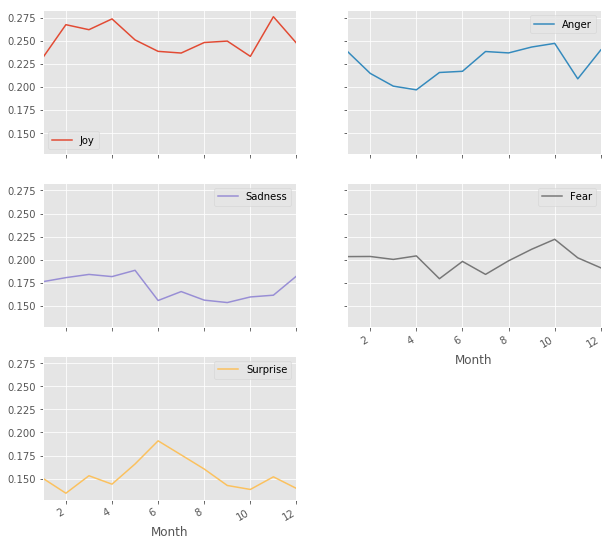

In [74]:
month_data.plot(figsize=[10,10], x='Month', subplots = 'TRUE', sharey=True,layout=[3,2])

##### Q: Is it possible to identify trends according to time of year?
##### A: Yes. Comparing each sentiment across all campuses, it seems that there a peaks of joy in the end of the calendar year and in the Spring, possibly because of Holidays and Spring Break. Fear drops around May, at the end of the school year, but increases steadily over the Fall, the same as Anger. Sadness drops sharply at the beggining of the Summer.

#### Weekend v. week day

In [127]:
TweetData['Weekday'] = TweetData['Date'].dt.weekday

In [128]:
day_university_data = TweetData.groupby(['University','Weekday']).mean().reset_index()
#0 = Monday

In [129]:
day_university_data = day_university_data[cols_of_interest]
day_university_data.to_csv('day_university_data.csv')

In [130]:
day_data = TweetData.groupby('Weekday').mean().reset_index()
cols_of_interest = ['Weekday','Joy','Anger','Sadness','Fear','Surprise']
day_data = day_data[cols_of_interest]

In [131]:
day_data

,Weekday,Joy,Anger,Sadness,Fear,Surprise
0,0,0.247611,0.209682,0.182049,0.188068,0.172590
1,1,0.254169,0.208449,0.188736,0.185798,0.162849
2,2,0.247935,0.226861,0.191261,0.179113,0.154830
3,3,0.258741,0.210573,0.179344,0.194765,0.156577
4,4,0.271942,0.202265,0.178818,0.188973,0.158002
5,5,0.255818,0.212853,0.187165,0.179859,0.164304
6,6,0.242270,0.221922,0.194185,0.174287,0.167336


In [132]:
day_data['Weekday'][day_data['Weekday'] == 0] = 'Monday'
day_data['Weekday'][day_data['Weekday'] == 1] = 'Tuesday'
day_data['Weekday'][day_data['Weekday'] == 2] = 'Wednesday'
day_data['Weekday'][day_data['Weekday'] == 3] = 'Thursday'
day_data['Weekday'][day_data['Weekday'] == 4] = 'Friday'
day_data['Weekday'][day_data['Weekday'] == 5] = 'Saturday'
day_data['Weekday'][day_data['Weekday'] == 6] = 'Sunday'

In [133]:
day_data

,Weekday,Joy,Anger,Sadness,Fear,Surprise
0,Monday,0.247611,0.209682,0.182049,0.188068,0.172590
1,Tuesday,0.254169,0.208449,0.188736,0.185798,0.162849
2,Wednesday,0.247935,0.226861,0.191261,0.179113,0.154830
3,Thursday,0.258741,0.210573,0.179344,0.194765,0.156577
4,Friday,0.271942,0.202265,0.178818,0.188973,0.158002
5,Saturday,0.255818,0.212853,0.187165,0.179859,0.164304
6,Sunday,0.242270,0.221922,0.194185,0.174287,0.167336


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b711358>,
      dtype=object)

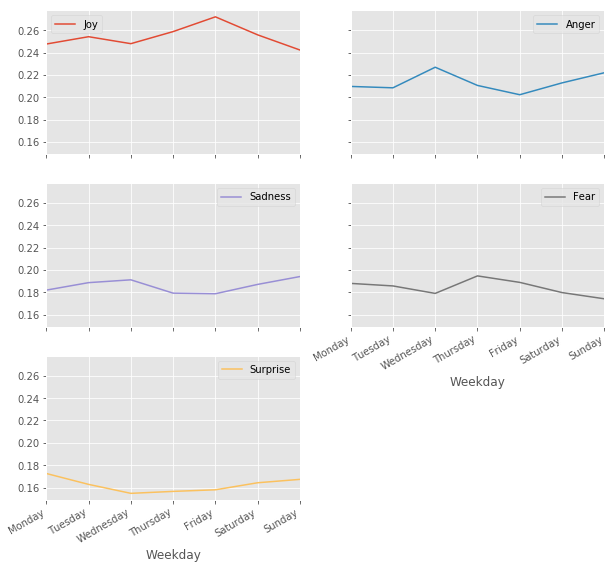

In [136]:
day_data.plot(figsize=[10,10], x='Weekday', subplots = 'TRUE', sharey=True,layout=[3,2])

##### Q: Is it possible to identify trends according to day of the week?
##### A: Yes. Unsurprisingly, there is a spike in Joy on Friday. The saddest and angriest day is Wednesday. Fear fluctuates across the week.